# Метод SSFM 2 порядка (с половинным линейным шагом справа, но с аппроксимацией нелинейного шага)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка численного решения

In [2]:
dfEnveloper = pd.read_csv("preciseRe.csv", sep = ",", header = None, skiprows = 1)
dfEnvelopei = pd.read_csv("preciseIm.csv", sep = ",", header = None, skiprows = 1)
#dfEnvelope.head(5)
dfEnveloper

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,NaN,NaN,-201.000000,-2.008040e+02,-200.607000,-200.411000,-200.215000,-2.000190e+02,-1.998220e+02,-1.996260e+02,...,199.233000,199.430000,1.996260e+02,1.998220e+02,2.000190e+02,200.215000,2.004110e+02,2.006070e+02,200.804,NaN
1,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN,NaN
2,0.074226,-1.000000e-05,-0.000004,1.250000e-05,-0.000003,-0.000011,0.000009,5.700000e-06,-1.120000e-05,-1.000000e-07,...,0.000010,-0.000007,-6.200000e-06,1.000000e-05,1.200000e-06,-0.000011,4.700000e-06,9.100000e-06,NaN,NaN
3,0.148451,5.100000e-06,0.000007,-9.900000e-06,-0.000003,0.000012,-0.000002,-8.900000e-06,4.200000e-06,4.300000e-06,...,-0.000013,0.000003,1.030000e-05,-6.100000e-06,-6.000000e-06,0.000008,8.000000e-07,-8.300000e-06,NaN,NaN
4,0.222677,-9.000000e-07,0.000008,-3.900000e-06,-0.000008,0.000010,0.000004,-1.410000e-05,1.800000e-06,1.340000e-05,...,-0.000002,-0.000001,3.900000e-06,-1.000000e-06,-4.500000e-06,0.000004,3.700000e-06,-6.900000e-06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,9.649343,-1.200000e-05,-0.000005,-1.200000e-06,-0.000011,-0.000010,-0.000002,-4.600000e-06,-7.100000e-06,-1.300000e-06,...,-0.000004,-0.000013,-2.400000e-06,3.000000e-07,-1.120000e-05,-0.000010,-1.000000e-07,-4.700000e-06,NaN,NaN
132,9.723569,-1.730000e-05,-0.000008,-3.700000e-06,-0.000012,-0.000011,-0.000003,-3.200000e-06,-8.100000e-06,0.000000e+00,...,-0.000004,-0.000008,-8.000000e-07,-2.100000e-06,-1.370000e-05,-0.000014,-7.600000e-06,-1.230000e-05,NaN,NaN
133,9.797795,-9.100000e-06,-0.000009,-3.300000e-06,-0.000011,-0.000016,-0.000004,-4.700000e-06,-1.180000e-05,-3.700000e-06,...,0.000006,-0.000005,-9.200000e-06,-4.000000e-07,-2.900000e-06,-0.000011,-5.900000e-06,-8.000000e-07,NaN,NaN
134,9.872020,-1.600000e-06,-0.000009,-1.080000e-05,-0.000001,-0.000005,-0.000010,4.000000e-07,7.000000e-07,-9.000000e-06,...,-0.000003,0.000009,4.400000e-06,-7.400000e-06,-6.000000e-07,0.000003,-5.900000e-06,-5.600000e-06,NaN,NaN


In [3]:
x_rowr = dfEnveloper.iloc[0]
xr =  x_rowr.to_numpy()[2:-1]
Nr = np.size(xr)

In [4]:
x_rowi = dfEnvelopei.iloc[0]
xi =  x_rowi.to_numpy()[2:-1]
Ni = np.size(xi)

In [5]:
dfEnveloper = dfEnveloper.drop(dfEnveloper.columns[[-2, -1]], axis = 1) 
dfEnveloper = dfEnveloper.drop(0, axis = 0) 
dfEnveloper.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
1,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
2,0.074226,-1.000000e-05,-0.000004,0.000013,-0.000003,-0.000011,0.000009,0.000006,-0.000011,-1.000000e-07,...,-1.050000e-05,0.000002,0.000010,-0.000007,-0.000006,0.000010,0.000001,-0.000011,4.700000e-06,0.000009
3,0.148451,5.100000e-06,0.000007,-0.000010,-0.000003,0.000012,-0.000002,-0.000009,0.000004,4.300000e-06,...,1.300000e-05,0.000002,-0.000013,0.000003,0.000010,-0.000006,-0.000006,0.000008,8.000000e-07,-0.000008
4,0.222677,-9.000000e-07,0.000008,-0.000004,-0.000008,0.000010,0.000004,-0.000014,0.000002,1.340000e-05,...,4.000000e-07,0.000001,-0.000002,-0.000001,0.000004,-0.000001,-0.000005,0.000004,3.700000e-06,-0.000007
5,0.296903,6.600000e-06,-0.000011,-0.000002,0.000011,-0.000004,-0.000010,0.000008,0.000004,-9.500000e-06,...,-1.200000e-06,-0.000013,0.000008,0.000010,-0.000012,-0.000003,0.000012,-0.000004,-1.010000e-05,0.000008


In [6]:
dfEnvelopei = dfEnvelopei.drop(dfEnvelopei.columns[[-2, -1]], axis = 1) 
dfEnvelopei = dfEnvelopei.drop(0, axis = 0) 
dfEnvelopei.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
1,0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,0.074226,-0.000002,-5.000000e-07,0.000002,-0.000000,-3.000000e-07,-8.000000e-07,-0.000000,0.000002,-0.000001,...,-6.200000e-06,3.000000e-06,3.800000e-06,-0.000004,-0.000001,0.000004,-7.000000e-07,-3.400000e-06,2.000000e-06,0.000002
3,0.148451,-0.000002,-5.900000e-06,0.000006,0.000003,-8.800000e-06,2.200000e-06,0.000008,-0.000007,-0.000005,...,-0.000000e+00,-1.000000e-07,9.000000e-07,-0.000002,-0.000001,0.000003,1.500000e-06,-5.000000e-06,-5.000000e-07,0.000006
4,0.222677,-0.000003,1.150000e-05,-0.000005,-0.000009,1.260000e-05,3.700000e-06,-0.000015,0.000002,0.000011,...,6.900000e-06,1.110000e-05,-1.220000e-05,-0.000001,0.000014,-0.000008,-1.300000e-05,1.180000e-05,9.300000e-06,-0.000013
5,0.296903,-0.000003,4.900000e-06,0.000003,-0.000003,1.000000e-06,2.200000e-06,-0.000007,-0.000002,0.000010,...,7.000000e-07,-1.600000e-06,9.000000e-07,-0.000003,-0.000002,0.000003,2.300000e-06,-1.000000e-07,-0.000000e+00,-0.000004


In [7]:
tr = dfEnveloper[0].to_numpy()
dfEnveloper = dfEnveloper.drop(dfEnveloper.columns[0], axis = 1) 
Mr = np.size(tr)
dfEnveloper

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
1,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2,-1.000000e-05,-0.000004,1.250000e-05,-0.000003,-0.000011,0.000009,5.700000e-06,-1.120000e-05,-1.000000e-07,1.070000e-05,...,-1.050000e-05,1.900000e-06,0.000010,-0.000007,-6.200000e-06,1.000000e-05,1.200000e-06,-0.000011,4.700000e-06,9.100000e-06
3,5.100000e-06,0.000007,-9.900000e-06,-0.000003,0.000012,-0.000002,-8.900000e-06,4.200000e-06,4.300000e-06,-4.200000e-06,...,1.300000e-05,1.700000e-06,-0.000013,0.000003,1.030000e-05,-6.100000e-06,-6.000000e-06,0.000008,8.000000e-07,-8.300000e-06
4,-9.000000e-07,0.000008,-3.900000e-06,-0.000008,0.000010,0.000004,-1.410000e-05,1.800000e-06,1.340000e-05,-7.900000e-06,...,4.000000e-07,1.100000e-06,-0.000002,-0.000001,3.900000e-06,-1.000000e-06,-4.500000e-06,0.000004,3.700000e-06,-6.900000e-06
5,6.600000e-06,-0.000011,-1.800000e-06,0.000011,-0.000004,-0.000010,8.100000e-06,4.400000e-06,-9.500000e-06,3.000000e-06,...,-1.200000e-06,-1.260000e-05,0.000008,0.000010,-1.170000e-05,-2.800000e-06,1.210000e-05,-0.000004,-1.010000e-05,8.300000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-1.200000e-05,-0.000005,-1.200000e-06,-0.000011,-0.000010,-0.000002,-4.600000e-06,-7.100000e-06,-1.300000e-06,9.000000e-07,...,-7.800000e-06,5.000000e-06,-0.000004,-0.000013,-2.400000e-06,3.000000e-07,-1.120000e-05,-0.000010,-1.000000e-07,-4.700000e-06
132,-1.730000e-05,-0.000008,-3.700000e-06,-0.000012,-0.000011,-0.000003,-3.200000e-06,-8.100000e-06,0.000000e+00,5.300000e-06,...,8.000000e-07,3.300000e-06,-0.000004,-0.000008,-8.000000e-07,-2.100000e-06,-1.370000e-05,-0.000014,-7.600000e-06,-1.230000e-05
133,-9.100000e-06,-0.000009,-3.300000e-06,-0.000011,-0.000016,-0.000004,-4.700000e-06,-1.180000e-05,-3.700000e-06,-2.300000e-06,...,-2.700000e-06,-1.300000e-06,0.000006,-0.000005,-9.200000e-06,-4.000000e-07,-2.900000e-06,-0.000011,-5.900000e-06,-8.000000e-07
134,-1.600000e-06,-0.000009,-1.080000e-05,-0.000001,-0.000005,-0.000010,4.000000e-07,7.000000e-07,-9.000000e-06,-2.200000e-06,...,9.500000e-06,1.000000e-07,-0.000003,0.000009,4.400000e-06,-7.400000e-06,-6.000000e-07,0.000003,-5.900000e-06,-5.600000e-06


In [8]:
ti = dfEnvelopei[0].to_numpy()
dfEnvelopei = dfEnvelopei.drop(dfEnvelopei.columns[0], axis = 1) 
Mi = np.size(ti)
dfEnvelopei

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
1,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,-0.000002,-5.000000e-07,0.000002,-0.000000,-3.000000e-07,-8.000000e-07,-0.000000,2.200000e-06,-1.000000e-06,-3.200000e-06,...,-6.200000e-06,3.000000e-06,3.800000e-06,-0.000004,-1.400000e-06,4.300000e-06,-7.000000e-07,-3.400000e-06,2.000000e-06,0.000002
3,-0.000002,-5.900000e-06,0.000006,0.000003,-8.800000e-06,2.200000e-06,0.000008,-7.000000e-06,-4.900000e-06,9.300000e-06,...,-0.000000e+00,-1.000000e-07,9.000000e-07,-0.000002,-1.400000e-06,3.300000e-06,1.500000e-06,-5.000000e-06,-5.000000e-07,0.000006
4,-0.000003,1.150000e-05,-0.000005,-0.000009,1.260000e-05,3.700000e-06,-0.000015,1.700000e-06,1.100000e-05,-5.200000e-06,...,6.900000e-06,1.110000e-05,-1.220000e-05,-0.000001,1.410000e-05,-7.500000e-06,-1.300000e-05,1.180000e-05,9.300000e-06,-0.000013
5,-0.000003,4.900000e-06,0.000003,-0.000003,1.000000e-06,2.200000e-06,-0.000007,-1.900000e-06,1.040000e-05,7.000000e-07,...,7.000000e-07,-1.600000e-06,9.000000e-07,-0.000003,-2.400000e-06,3.300000e-06,2.300000e-06,-1.000000e-07,-0.000000e+00,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.000011,3.600000e-06,0.000003,0.000015,8.000000e-06,-5.700000e-06,0.000006,1.300000e-05,-1.000000e-07,-7.000000e-07,...,-2.800000e-06,-5.400000e-06,-3.000000e-07,0.000005,-8.000000e-07,-3.000000e-07,1.010000e-05,1.110000e-05,5.000000e-07,0.000004
132,0.000002,-3.800000e-06,0.000005,0.000005,-4.500000e-06,1.800000e-06,0.000012,3.200000e-06,-2.700000e-06,6.300000e-06,...,-4.800000e-06,-3.300000e-06,3.700000e-06,-0.000005,-8.900000e-06,-1.000000e-07,1.100000e-06,-6.800000e-06,-4.400000e-06,0.000006
133,-0.000007,7.900000e-06,-0.000002,-0.000013,-6.000000e-07,-3.000000e-07,-0.000013,-2.000000e-07,1.130000e-05,-2.600000e-06,...,-4.600000e-06,4.900000e-06,-6.200000e-06,-0.000011,1.300000e-06,-2.500000e-06,-1.350000e-05,-4.500000e-06,2.100000e-06,-0.000010
134,-0.000010,-1.700000e-05,-0.000004,-0.000003,-1.610000e-05,-9.100000e-06,0.000003,-6.400000e-06,-6.300000e-06,9.800000e-06,...,-9.000000e-07,-6.100000e-06,9.400000e-06,0.000002,-1.410000e-05,-5.200000e-06,-1.700000e-06,-1.690000e-05,-1.530000e-05,-0.000004


In [9]:
#строка - модуль в опр момент времени, столбец - модуль в опр координате
qr = np.zeros((Nr, Mr))
for n in range(Nr):
    for m in range(Mr):
        qr[n, m] = dfEnveloper[n + 1].loc[dfEnveloper.index[m]]
qi = np.zeros((Ni, Mi))
for n in range(Ni):
    for m in range(Mi):
        qi[n, m] = dfEnvelopei[n + 1].loc[dfEnvelopei.index[m]]

In [10]:
np.size(tr)

135

# Подсчёт аналитики

In [11]:
from math import pi
N_an = Nr
L_an = xr[-1] - xr[0]
T_an = tr[-1]
tau = tr[1]
M_an = np.size(tr)
A = 1.0
a = 0.5
b = 0.5
alpha = 1.
k = -0.25
x_0 = 0.
thetta_0 = 0.


In [12]:
tr[-1] - tr[0]

9.946246216

In [13]:
T_an

9.946246216

In [14]:
omega = (120 * A * A + 2141 * 4 * a * b) / (256 * 4 * a * b);

eps = 24 * pow(4 * a * b, 2) / pow(A, 4);

chi = -(4 * A * A + 332 * a * b) / (32 * a * b);

v = -(1 + 4 * chi) / 8; 

In [15]:
v

5.3125

In [16]:
v

5.3125

In [17]:
x_an = np.linspace(-L_an/2, L_an/2, N_an, endpoint=False)
t_an = np.arange(0., T_an, tau)

q_an = np.zeros((int(N_an), int(M_an)), dtype=complex)

In [18]:
T_period = L_an / (2 * v)  # Время прохождения половины области

for m in range(M_an):
    t_current = t_an[m]
    
    # Вычисляем смещение с учетом периодичности
    x_shift = v * t_current
    
    # Приводим смещение к основному периоду [-L_an/2, L_an/2)
    x_shift = x_shift % L_an
    if x_shift > L_an/2:
        x_shift -= L_an
    
    t_shift = omega * t_current + thetta_0
    
    for n in range(N_an):
        # Периодическое продолжение для x с учетом смещения
        x_periodic = x_an[n] - x_shift
        x_periodic = x_periodic - L_an * np.floor((x_periodic + L_an/2) / L_an)
        
        phi = k * x_periodic - t_shift
        
        exp_plus = np.exp(alpha * (x_periodic - x_0))
        exp_minus = np.exp(-alpha * (x_periodic - x_0))
        
        q_an[n, m] = A * np.exp(1j * phi) / (a * exp_plus + b * exp_minus)
        

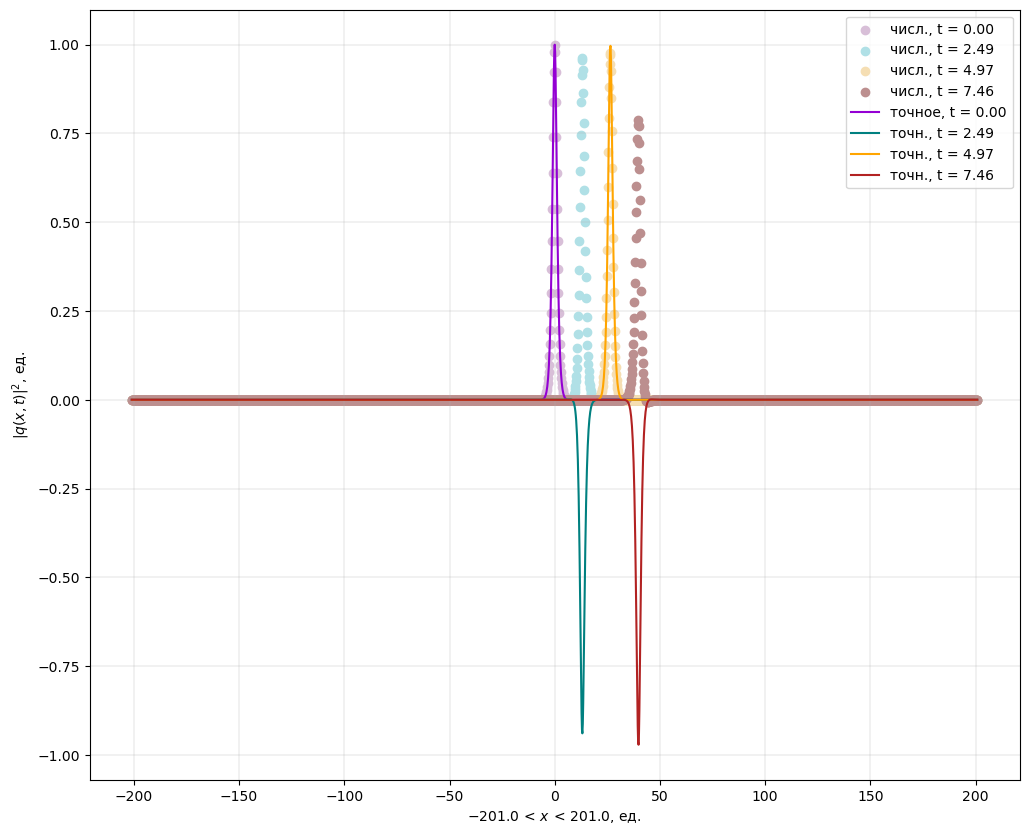

In [19]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xr, qr[:, 0 + 0], color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xr, qr[:, int(np.size(tr)/4) + 0], color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xr, qr[:, int(np.size(tr)/2) + 0], color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xr, qr[:, int(3*np.size(tr)/4) + 0], color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.plot(xr, q_an[:, 0].real, color = "darkviolet", label = f'точное, t = 0.00')
plt.plot(xr, q_an[:, int(np.size(tr)/4) + 0].real, color = "teal", label = f'точн., t = {np.round(T_an / 4, 2)}')
plt.plot(xr, q_an[:, int(np.size(tr)/2) + 0].real, color = "orange", label = f'точн., t = {np.round(T_an / 2, 2)}')
plt.plot(xr, q_an[:, int(3 * np.size(tr)/4) + 0].real, color = "firebrick", label = f'точн., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f"|$q(x, t)|^2$, ед.")
plt.xlabel(f"${np.round(np.min(x_an), 0)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 0)}$, ед.")
plt.legend()

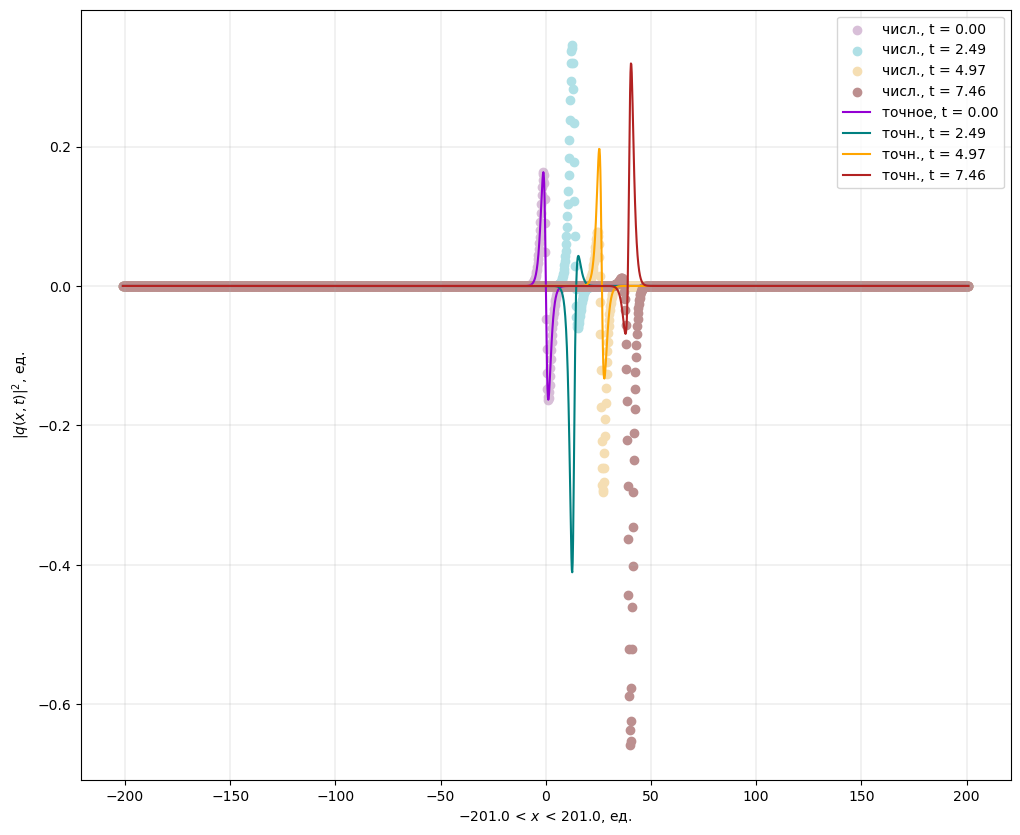

In [20]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xi, qi[:, 0 + 0], color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xi, qi[:, int(np.size(ti)/4) + 0], color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xi, qi[:, int(np.size(ti)/2) + 0], color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xi, qi[:, int(3*np.size(ti)/4) + 0], color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.plot(xi, q_an[:, 0].imag, color = "darkviolet", label = f'точное, t = 0.00')
plt.plot(xi, q_an[:, int(np.size(ti)/4) + 0].imag, color = "teal", label = f'точн., t = {np.round(T_an / 4, 2)}')
plt.plot(xi, q_an[:, int(np.size(ti)/2) + 0].imag, color = "orange", label = f'точн., t = {np.round(T_an / 2, 2)}')
plt.plot(xi, q_an[:, int(3 * np.size(ti)/4) + 0].imag, color = "firebrick", label = f'точн., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f"|$q(x, t)|^2$, ед.")
plt.xlabel(f"${np.round(np.min(x_an), 0)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 0)}$, ед.")
plt.legend()

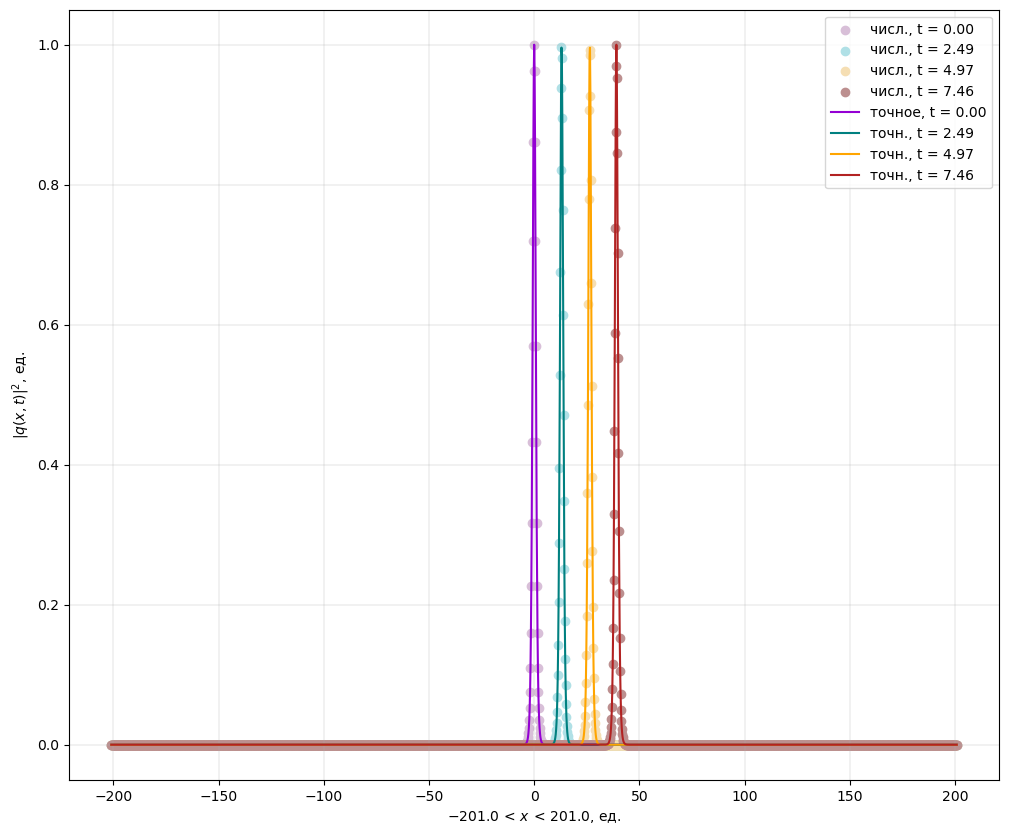

In [21]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(xi, qr[:, 0 + 0]**2 + qi[:, 0 + 0]**2, color = "thistle", label = 'числ., t = 0.00')
plt.scatter(xi, qr[:, int(np.size(ti)/4) + 0]**2 + qi[:, int(np.size(ti)/4) + 0]**2, color = "powderblue", label = f'числ., t = {np.round(T_an / 4, 2)}')
plt.scatter(xi, qr[:, int(np.size(ti)/2) + 0]**2 + qi[:, int(np.size(ti)/2) + 0]**2, color = "wheat", label = f'числ., t = {np.round(T_an / 2, 2)}')
plt.scatter(xi, qr[:, 3 * int(np.size(ti)/4) + 0]**2 + qi[:, 3 * int(np.size(ti)/4) + 0]**2, color = "rosybrown", label = f'числ., t = {np.round(3 * T_an / 4, 2)}')
plt.plot(xi, q_an[:, 0 + 0].real**2 + q_an[:, 0 + 0].imag**2, color = "darkviolet", label = f'точное, t = 0.00')
plt.plot(xi, q_an[:, int(np.size(ti)/4) + 0].real**2 + q_an[:, int(np.size(ti)/4) + 0].imag**2, color = "teal", label = f'точн., t = {np.round(T_an / 4, 2)}')
plt.plot(xi, q_an[:, int(np.size(ti)/2) + 0].real**2 + q_an[:, int(np.size(ti)/2) + 0].imag**2, color = "orange", label = f'точн., t = {np.round(T_an / 2, 2)}')
plt.plot(xi, q_an[:, 3 * int(np.size(ti)/4) + 0].real**2 + q_an[:, 3 * int(np.size(ti)/4) + 0].imag**2, color = "firebrick", label = f'точн., t = {np.round(3 * T_an / 4, 2)}')
plt.grid(lw = 0.25)
plt.ylabel(f"|$q(x, t)|^2$, ед.")
plt.xlabel(f"${np.round(np.min(x_an), 0)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 0)}$, ед.")
plt.legend()

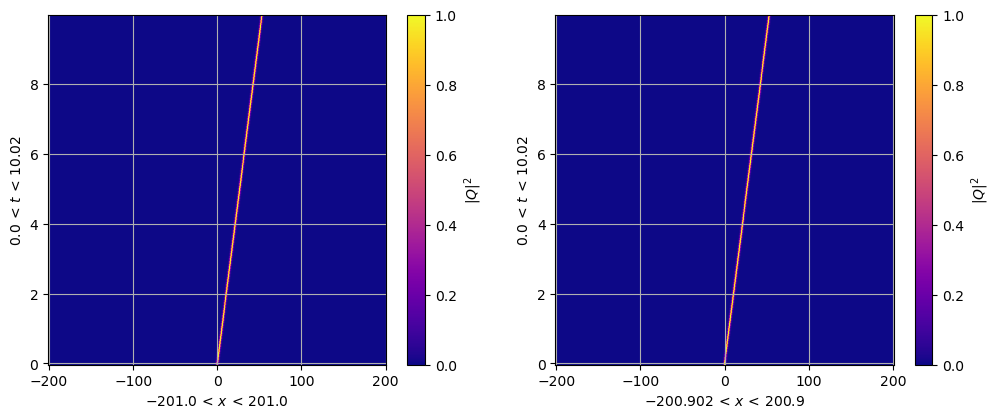

In [22]:
T, X = np.meshgrid(tr, xr)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
graph = ax.pcolormesh(X, T , qr**2 + qi**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)

T_an, X_an = np.meshgrid(t_an, x_an)
ax = fig.add_subplot(222)
graph = ax.pcolormesh(X_an[:, :], T_an[:, :], (q_an.real)**2 + (q_an.imag)**2, shading='nearest', cmap = 'plasma')
ax.set_ylabel(f"${np.min(t_an)}\, < \, t \, < \, {np.round(np.max(t_an) + t_an[-1] - t_an[-2], 2)}$")
ax.set_xlabel(f"${np.min(x_an)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)
#DFT

Text(0.5, 0, '$|q|^2$')

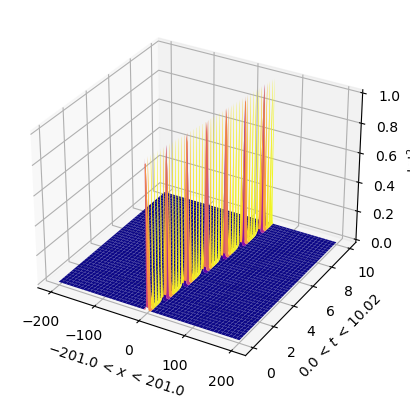

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, T,  qr**2 + qi**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.set_zlabel(f"$|q|^2$")

In [24]:
dfEnveloper2 = pd.read_csv("a2Re.csv", sep = ",", header = None, skiprows = 1)
dfEnvelopei2 = pd.read_csv("a2Im.csv", sep = ",", header = None, skiprows = 1)
x_rowr2 = dfEnveloper2.iloc[0]
xr2 =  x_rowr2.to_numpy()[2:-1]
Nr2 = np.size(xr2)
x_rowi2 = dfEnvelopei2.iloc[0]
xi2 =  x_rowi2.to_numpy()[2:-1]
Ni2 = np.size(xi2)
dfEnveloper2 = dfEnveloper2.drop(dfEnveloper2.columns[[-2, -1]], axis = 1) 
dfEnveloper2 = dfEnveloper2.drop(0, axis = 0) 
dfEnvelopei2 = dfEnvelopei2.drop(dfEnvelopei2.columns[[-2, -1]], axis = 1) 
dfEnvelopei2 = dfEnvelopei2.drop(0, axis = 0) 
tr2 = dfEnveloper2[0].to_numpy()
dfEnveloper2 = dfEnveloper2.drop(dfEnveloper2.columns[0], axis = 1) 
Mr2 = np.size(tr2)
ti2 = dfEnvelopei2[0].to_numpy()
dfEnvelopei2 = dfEnvelopei2.drop(dfEnvelopei2.columns[0], axis = 1) 
Mi2 = np.size(ti2)
qr2 = np.zeros((Nr2, Mr2))
for n in range(Nr2):
    for m in range(Mr2):
        qr2[n, m] = dfEnveloper2[n + 1].loc[dfEnveloper2.index[m]]
qi2 = np.zeros((Ni2, Mi2))
for n in range(Ni2):
    for m in range(Mi2):
        qi2[n, m] = dfEnvelopei2[n + 1].loc[dfEnvelopei2.index[m]]

In [31]:
st = 1
amp_an = np.abs(q_an[:, :-st])       # Амплитуда аналитического сигнала
amp_num1 = np.abs(qr2[:, :-st] + 1j * qi2[:, :-st])  # Амплитуда 1-го приближения
amp_num2 = np.abs(qr[:, :-st] + 1j * qi[:, :-st]) # Амплитуда 2-го приближения
diff1 = np.linalg.norm(amp_num1 - amp_an, axis=0, ord=1) / np.size(q_an,axis=0)
                       #np.inf)
diff2 = np.linalg.norm(amp_num2 - amp_an, axis=0, ord=1) / np.size(q_an,axis=0)
                       #np.inf)

Text(0.5, 0.98, 'Квадраты разностей амплитуд решений, полученных с $ \\mathbb{O}(t) \\,\\,\\, и \\,\\,\\,\\mathbb{O}(t^2)$')

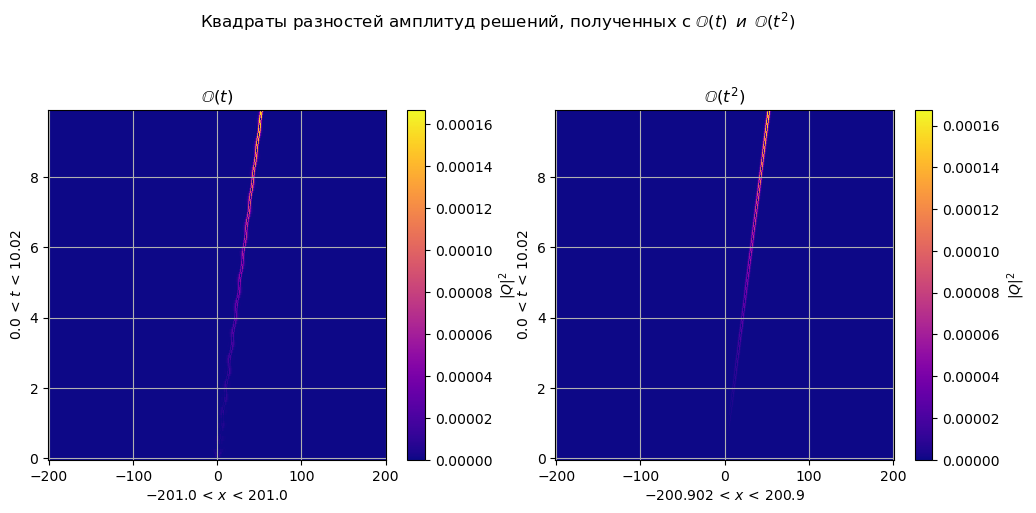

In [32]:
T2, X2 = np.meshgrid(tr2, xr2)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
ax.set_title(r"$\mathbb{O}(t)$")
graph = ax.pcolormesh(X[:, :-st], T[:, :-st], (amp_an - amp_num1)**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)

T_an, X_an = np.meshgrid(t_an, x_an)
ax = fig.add_subplot(222)
graph = ax.pcolormesh(X[:, :-st], T[:, :-st], (amp_an - amp_num2)**2, cmap = 'plasma')
ax.set_title(r"$\mathbb{O}(t^2)$")
ax.set_ylabel(f"${np.min(t_an)}\, < \, t \, < \, {np.round(np.max(t_an) + t_an[-1] - t_an[-2], 2)}$")
ax.set_xlabel(f"${np.min(x_an)}\, < \, x \, < \, {np.round(np.max(x_an) + x_an[-1] - x_an[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)
fig.suptitle(r"Квадраты разностей амплитуд решений, полученных с $ \mathbb{O}(t) \,\,\, и \,\,\,\mathbb{O}(t^2)$")

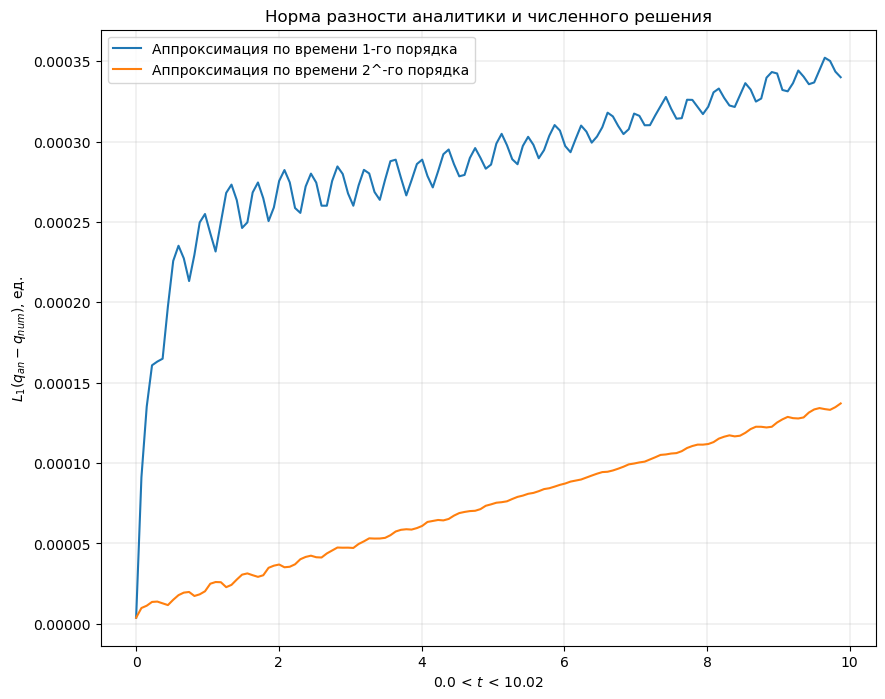

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

graph = ax.plot(tr2[:-st], diff1, label = 'Аппроксимация по времени 1-го порядка')
graph = ax.plot(tr[:-st], diff2, label = 'Аппроксимация по времени 2^-го порядка')

plt.grid(lw = 0.25)
plt.legend()
plt.title(r"Норма разности аналитики и численного решения")
plt.ylabel(r"$L_{1}(q_{an} - q_{num})$, ед.")
           #\infty}(q_{an} - q_{num})$, ед.")
plt.xlabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$");

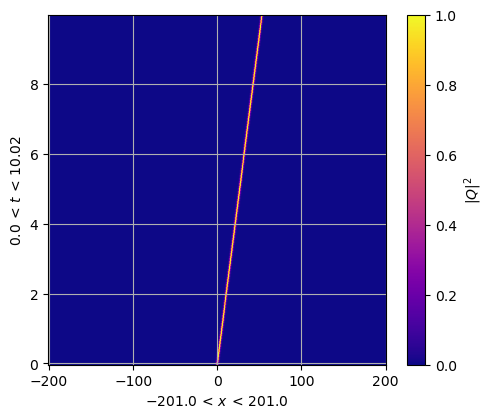

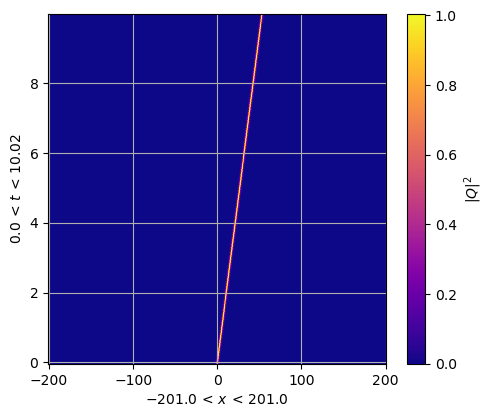

In [27]:
T, X = np.meshgrid(tr, xr)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
graph = ax.pcolormesh(X, T , qr**2 + qi**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr)}\, < \, t \, < \, {np.round(np.max(tr) + tr[-1] - tr[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr)}\, < \, x \, < \, {np.round(np.max(xr) + xr[-1] - xr[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)

T2, X2 = np.meshgrid(tr2, xr2)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(222)
graph = ax.pcolormesh(X2, T2 , qr2**2 + qi2**2, cmap = 'plasma')
ax.set_ylabel(f"${np.min(tr2)}\, < \, t \, < \, {np.round(np.max(tr2) + tr2[-1] - tr2[-2], 2)}$")
ax.set_xlabel(f"${np.min(xr2)}\, < \, x \, < \, {np.round(np.max(xr2) + xr2[-1] - xr2[-2], 2)}$")
ax.grid()
colbar = fig.colorbar(graph)
colbar.set_label("$|Q|^2$", rotation = 90)